In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

ModuleNotFoundError: No module named 'sklearn'

<font size="4">Считываем данные, выводим количество строк и столбцов, а также описательные статистики признаков.</font>

In [323]:
data = pd.read_csv('train.csv')
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...       px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...              20       756  2549     9     7   
1        136        3     ...             905      1988  2631    17     3   
2        145        5     ...            1263      1716  2603    11     2   
3        131        6     ...            1216      1786  2769    16     8   
4        141        2     ...            1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [324]:
data.shape

(2000, 21)

In [325]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

          ...         px_height     px_width          ram         sc_h  \
count     ...       2000.000000  2000.000000  2000.000000  2000.000000   
mean      ...        645.108000  1251.515500  2124.213000    12.306500   
std       ...        443.780811   432.199447  1084.732044     4.213245   
min       ...          0.000000   500.000000   256.000000     5.000000   
25%       ...        282.750000   874.750000  1207.500000     9.000000   
50%       ...        564.000000  1247.000000  2146.500000    12.000000   
75%       ...        947.250000  1633.000000  3064.500000    16.000000   
max       ...       1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000  

[8 rows x 21 columns]

<font size = "4">Категориальных типов или пропущенных значений нет.</font>

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


<font size="4">С помощью pairplot можем увидеть распределение некоторых признаков по целевой переменной</font>

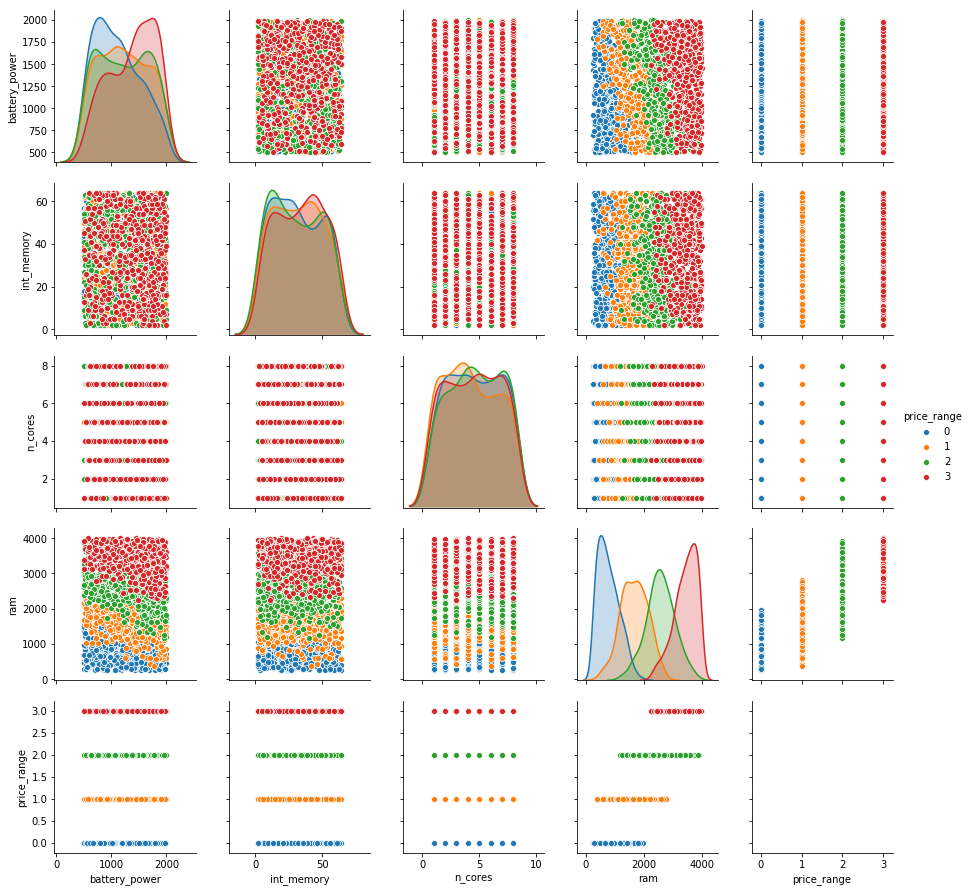

In [327]:
sns.pairplot(data[['battery_power', 'int_memory', 'n_cores', 'ram', 'price_range']], hue='price_range')

<font size = "4">Матрица корреляции признаков</font>

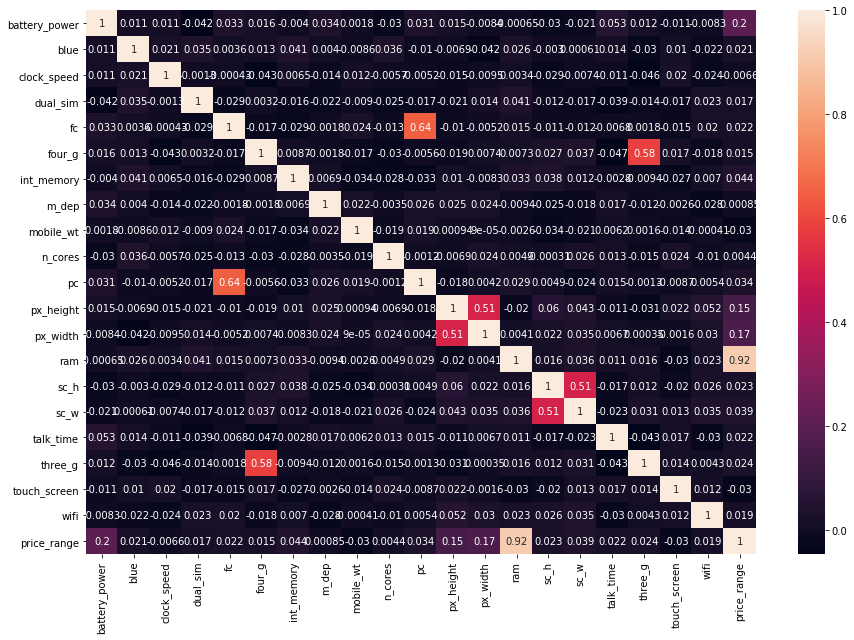

In [328]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

<font size = "4">Boxplot для некоторых признаков.</font>

In [329]:
def build_grid(y, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for idx, ax in enumerate(axes.flat):
        sns.boxplot(x='price_range', y=y[idx], data=data, ax=ax)

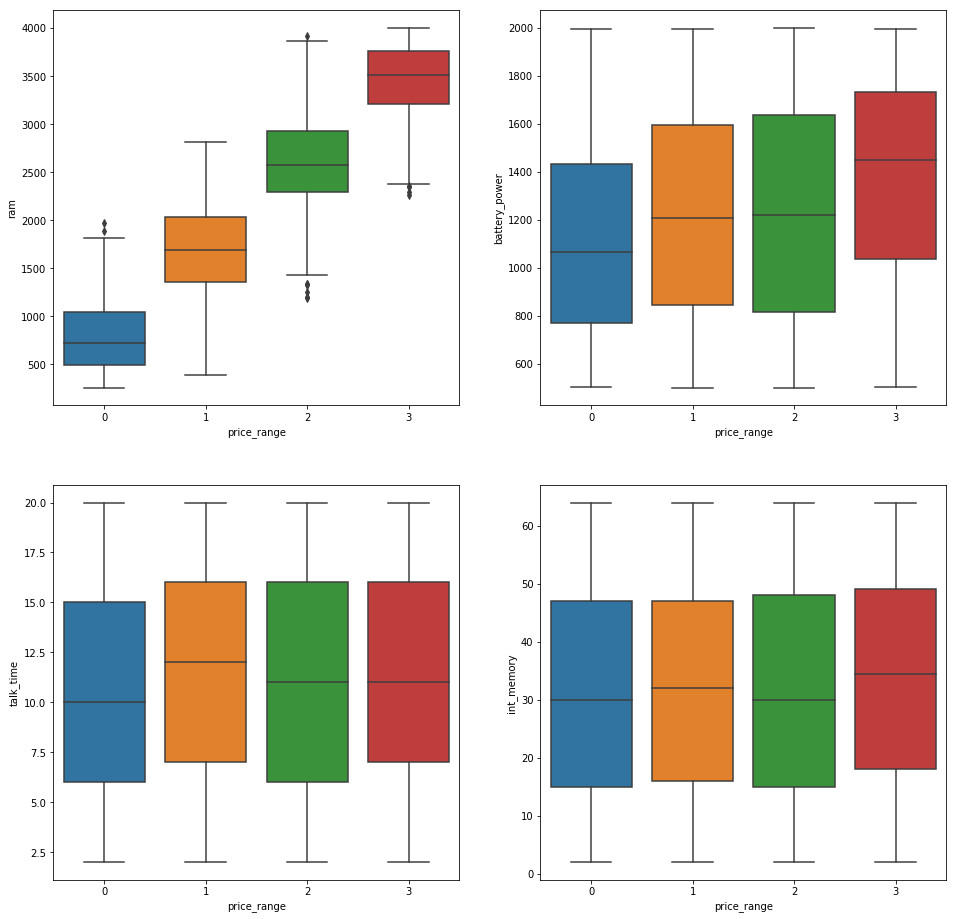

In [330]:
build_grid(['ram', 'battery_power', 'talk_time', 'int_memory'], 2, 2)

In [331]:
X, Y = data.iloc[:, :-1], data['price_range']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

<font size = "4">Масштабируем данные</font>

In [332]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [333]:
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

<font size = "4">Подбор числа соседей для KNN классификатора</font>

In [334]:
def choose_k(X_train, Y_train, X_test, Y_test):
    error = []
    max_k = 40
    
    for k in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        pred = knn.predict(X_test)
        error.append(np.mean(pred != Y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1, max_k), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

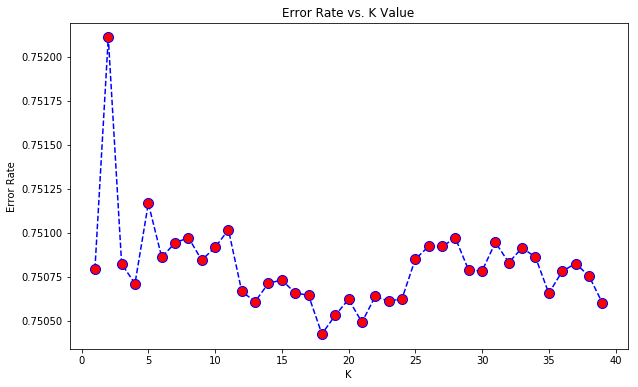

In [335]:
choose_k(X_train,Y_train, X_test, Y_test)

<font size = "4">Сравнение при k = 1 и k = 18</font>

In [338]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
knn1_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test, knn1_pred))
print('\n')
print(classification_report(Y_test, knn1_pred))

WITH K=1


[[70 50 27  4]
 [42 55 25 24]
 [28 44 48 28]
 [ 8 29 56 62]]


             precision    recall  f1-score   support

          0       0.47      0.46      0.47       151
          1       0.31      0.38      0.34       146
          2       0.31      0.32      0.32       148
          3       0.53      0.40      0.45       155

avg / total       0.41      0.39      0.40       600



In [339]:
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train, Y_train)
knn2_pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(Y_test, knn2_pred))
print('\n')
print(classification_report(Y_test, knn2_pred))

WITH K=18


[[93 46 10  2]
 [62 44 31  9]
 [20 44 56 28]
 [ 4 24 48 79]]


             precision    recall  f1-score   support

          0       0.52      0.62      0.56       151
          1       0.28      0.30      0.29       146
          2       0.39      0.38      0.38       148
          3       0.67      0.51      0.58       155

avg / total       0.47      0.45      0.46       600



<font size = "4">Обучение логистической регрессии</font>

In [340]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [341]:
log_pred = logmodel.predict(X_test)

In [342]:
print(classification_report(Y_test, log_pred))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92       151
          1       0.72      0.59      0.65       146
          2       0.68      0.55      0.60       148
          3       0.81      0.98      0.89       155

avg / total       0.77      0.78      0.77       600



In [343]:
print(confusion_matrix(Y_test, log_pred))

[[150   1   0   0]
 [ 24  86  36   0]
 [  0  32  81  35]
 [  0   0   3 152]]


<font size = "4">Обучение SVM. Для начала обучим без подбора параметров.</font>

In [344]:
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [345]:
svc_pred = model.predict(X_test)

In [346]:
print(classification_report(Y_test, svc_pred))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93       151
          1       0.79      0.86      0.82       146
          2       0.77      0.83      0.80       148
          3       0.96      0.86      0.91       155

avg / total       0.87      0.86      0.87       600



In [347]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear']} 

In [348]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [349]:
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.25213675213675213, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2532188841201717, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2532188841201717, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.844017094017094, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.851931330472103, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7896995708154506, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.25213675213675213, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2532188841201717, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2939914163090129, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .....

[CV]  C=10, gamma=1, kernel=rbf, score=0.6303418803418803, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6266094420600858, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6330472103004292, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.967948717948718, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9463519313304721, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.927038626609442, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.8888888888888888, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................

[CV]  C=100, gamma=0.0001, kernel=linear, score=0.9700854700854701, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.9613733905579399, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.9592274678111588, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6303418803418803, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6266094420600858, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6330472103004292, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9636752136752137, total=   0.3s
[CV] C=1000, gamma=1, ker

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

<font size = "4">Выведем лучшие параметры</font>

In [350]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [351]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [352]:
svc_opt_pred = grid.predict(X_test)

In [353]:
print(classification_report(Y_test, svc_opt_pred))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98       151
          1       0.91      0.99      0.95       146
          2       0.98      0.91      0.94       148
          3       0.97      0.99      0.98       155

avg / total       0.96      0.96      0.96       600



In [354]:
print(confusion_matrix(Y_test, svc_opt_pred))

[[145   6   0   0]
 [  0 145   1   0]
 [  0   9 134   5]
 [  0   0   2 153]]


<font size = "4">Аналогичным образом будем строить дерево решений.</font>

In [355]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [356]:
dtree_pred = dtree.predict(X_test)

In [357]:
print(classification_report(Y_test, dtree_pred))

             precision    recall  f1-score   support

          0       0.90      0.87      0.89       151
          1       0.75      0.80      0.77       146
          2       0.76      0.73      0.74       148
          3       0.87      0.86      0.87       155

avg / total       0.82      0.82      0.82       600



In [358]:
tree_param_grid = {'max_depth': [5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']} 

In [359]:
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, refit=True, verbose=3)

In [360]:
tree_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=5, score=0.8162393162393162, total=   0.1s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=5, score=0.8412017167381974, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=5, score=0.7854077253218884, total=   0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=6, score=0.8205128205128205, total=   0.1s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=6, score=0.8412017167381974, total=   0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=6, score=0.778969957081545, total=   0.0s
[CV] criterion=gini, max_depth=7 ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=7, score=0.8283261802575107, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=7, score=0.8090128755364807, total=   0.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=8, score=0.8269230769230769, total=   0.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=8, score=0.8261802575107297, total=   0.0s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=8, score=0.8133047210300429, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=9, score=0.8247863247863247, total=   0.0s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=9, score=0.8326180257510729, total=   0.0s
[CV] criterion=gini, max_depth=9 ................

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [361]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [362]:
dtree_opt_pred = tree_grid.predict(X_test)

In [363]:
print(classification_report(Y_test, dtree_opt_pred))

             precision    recall  f1-score   support

          0       0.90      0.87      0.89       151
          1       0.76      0.84      0.80       146
          2       0.81      0.74      0.77       148
          3       0.87      0.90      0.89       155

avg / total       0.84      0.84      0.84       600



<font size = "4">Выберем лучший классификатор по метрике cohen_kappa</font>

In [364]:
predictions = {'KNN with 1 neighbour': knn1_pred,
              'KNN with 18 neighbours': knn2_pred,
              'Logistic regression': log_pred,
              'SVM with linear kernel, C=1 and gamma=auto': svc_pred,
              'Optimized SVM C=100': svc_opt_pred,
              'Decision Tree': dtree_pred,
              'Optimized Decision Tree': dtree_opt_pred}

In [365]:
kappa_scores = []

for desc, pred in predictions.items():
    print('Kappa score for ' + desc + ':', cohen_kappa_score(Y_test, pred))

Kappa score for KNN with 1 neighbour: 0.18974715671547915
Kappa score for KNN with 18 neighbours: 0.2715239142263828
Kappa score for Logistic regression: 0.7084645428345704
Kappa score for SVM with linear kernel, C=1 and gamma=auto: 0.817853334912925
Kappa score for Optimized SVM C=100: 0.9488849132710322
Kappa score for Decision Tree: 0.7577732920980018
Kappa score for Optimized Decision Tree: 0.7844212896940782
